<a href="https://colab.research.google.com/github/jdoijad15115/DR-Techniques-and-Clustering/blob/main/Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance Analysis of Dimensionality Reduction Techniques on EuroSAT Satellite Images

https://zenodo.org/records/7711810#.ZAm3k-zMKEA Dataset link

# 🌍 EuroSAT Dataset Description

The **EuroSAT** dataset is a labeled satellite image dataset derived from the **Sentinel-2** satellite mission, designed for land use and land cover classification tasks. It contains **27,000 images** covering diverse European landscapes, split across **10 different classes**.

---

## 📌 Key Features

- **Image Size:** 64x64 pixels with 3 RGB channels  
- **Total Images:** 27,000 satellite images  
- **Classes:** 10 land use/land cover categories:
  - 🏘️ **Residential**  
  - 🏭 **Industrial**  
  - 🛣️ **Highway**  
  - 🌊 **River**  
  - 🌳 **Forest**  
  - 🌾 **Pasture**  
  - 🌱 **Herbaceous vegetation**  
  - 🚜 **Agricultural land**  
  - 🏖️ **Sea/Lake**  
  - 🌴 **Permanent crop**  

- **Source:** Data collected from the **Sentinel-2** satellite, providing multi-spectral imaging with high spatial resolution.

---


  


## **Import Libraries**

In [ ]:
# Basics
import numpy as np
import pandas as pd
import os
import glob

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



##  **Download the EuroSAT Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!wget https://zenodo.org/records/7711810/files/EuroSAT_RGB.zip?download=1 -O EuroSAT_RGB.zip
!unzip -q EuroSAT_RGB.zip -d EuroSAT_Dataset


--2025-04-15 16:12:55--  https://zenodo.org/records/7711810/files/EuroSAT_RGB.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94658721 (90M) [application/octet-stream]
Saving to: ‘EuroSAT_RGB.zip’

EuroSAT_RGB.zip     100%[===================>]  90.27M  5.75MB/s    in 16s     

2025-04-15 16:13:11 (5.67 MB/s) - ‘EuroSAT_RGB.zip’ saved [94658721/94658721]



In [ ]:
!unzip EuroSAT_RGB.zip -d EuroSAT


Streaming output truncated to the last 5000 lines.
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_489.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_1573.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_270.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_516.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_2683.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_502.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_2697.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_264.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_2867.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_2873.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_258.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_2126.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_1349.jpg  
  inflating: EuroSAT/EuroSAT_RGB/Residential/Residential_2640.jpg  
  i

In [ ]:
!ls EuroSAT


EuroSAT_RGB


In [ ]:
import os
import random
import shutil
from pathlib import Path

# Define original and optimized paths
# The correct path is "/content/EuroSAT/EuroSAT_RGB"
original_data_path = "/content/EuroSAT/EuroSAT_RGB"  # Adjust if needed
optimized_data_path = "/content/EuroSAT_Optimized"
os.makedirs(optimized_data_path, exist_ok=True)

# Get all class names
all_classes = [d for d in os.listdir(original_data_path) if os.path.isdir(Path(original_data_path) / d)]

# Undersampling: Keep only 2000 images per class
num_samples = 2000

for class_name in all_classes:
    class_dir = Path(original_data_path) / class_name
    target_dir = Path(optimized_data_path) / class_name
    os.makedirs(target_dir, exist_ok=True)

    # List all images in class directory
    all_images = list(class_dir.glob("*.jpg"))

    # Randomly select up to 2000 images per class
    sampled_images = random.sample(all_images, min(num_samples, len(all_images)))

    # Copy selected images to the optimized directory
    for img in sampled_images:
        shutil.copy(img, target_dir / img.name)

print("✅ Dataset successfully optimized with all classes, 2000 images per class.")

✅ Dataset successfully optimized with all classes, 2000 images per class.


##**Explore the Dataset Structure**

### 1 Check Dataset Structure


The first thing to do with any dataset is to understand its structure. For the EuroSAT dataset, which contains satellite images of different land cover types (e.g., forest, residential, river, etc.), this step ensures that:

The data is organized correctly (e.g., folders by class).

All expected classes and files are present.

We identify how the images are stored (file type, name format).

For example, in EuroSAT, we expect folders for classes like Forest, SeaLake, Industrial, etc. Each folder should contain images representing that class.

**👉 Why this is important:**

If any class is missing or incorrectly named, it will affect model training.

We need to ensure that each image is associated with the correct class from the start.

Let’s also count how many images are in each class:

In [ ]:
import os

data_path = "/content/EuroSAT_Optimized"
  # Adjust this if needed
print("✅ Classes:", os.listdir(data_path))

✅ Classes: ['Pasture', 'SeaLake', 'PermanentCrop', 'River', 'Highway', 'AnnualCrop', 'Forest', 'Residential', 'Industrial', 'HerbaceousVegetation']



###🔍2 Visualize Sample Images

🖼️ Step 2: Visualizing Sample Images
Once we know the structure is correct, it’s time to see the data. Visualization helps us understand:

What the images look like — are they clear, noisy, or blurry?

How different the classes appear visually.

Whether images are wrongly labeled (e.g., a "Forest" image in "Industrial").

**👉 Why this is important:**

Seeing images gives us a gut feeling about the problem.

If two classes look very similar, the model might struggle to differentiate between them.

If images are low quality or noisy, we might need denoising techniques.

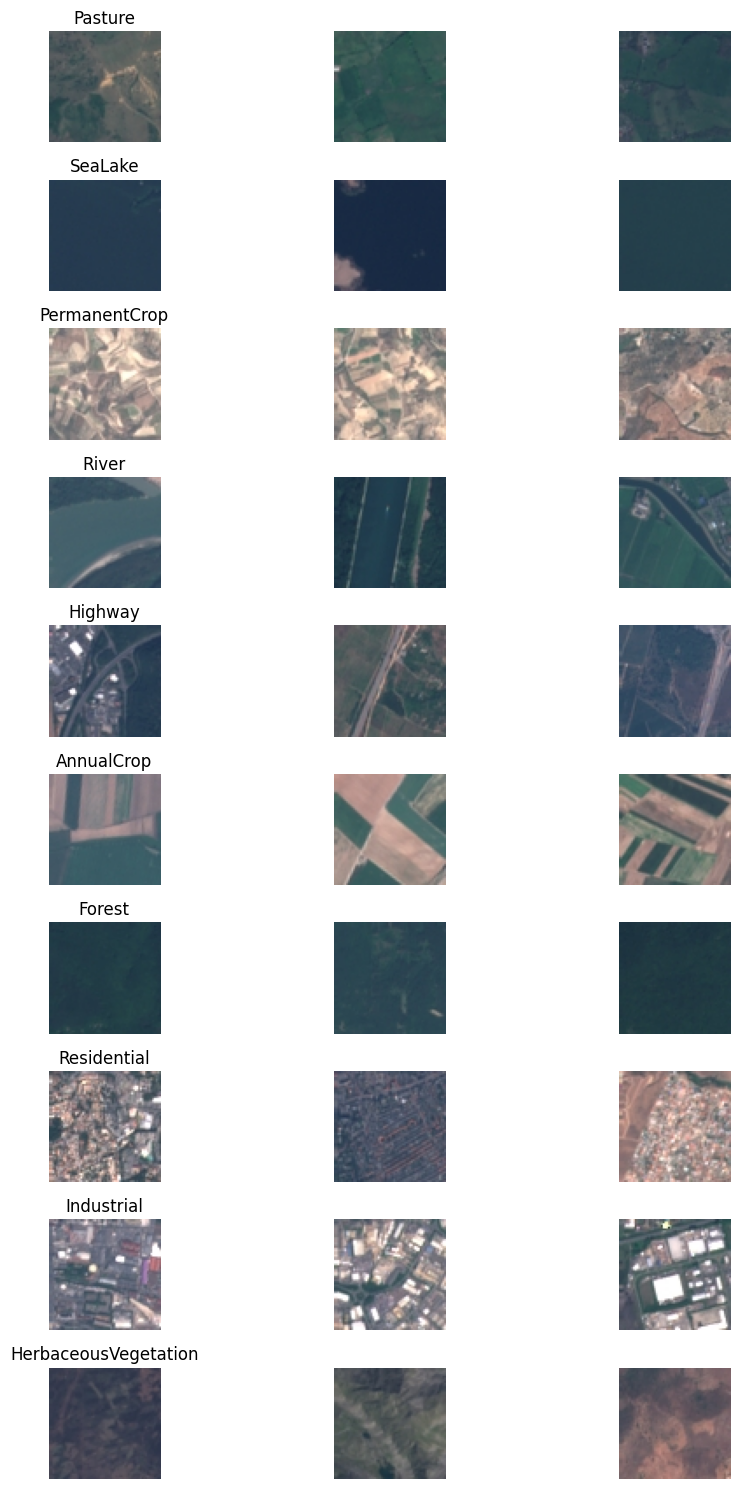

In [ ]:
!pip install opencv-python-headless
import matplotlib.pyplot as plt
import cv2
import random

def show_samples(data_path, classes, samples=3):
    fig, axes = plt.subplots(len(classes), samples, figsize=(10, 15))

    for i, category in enumerate(classes):
        category_path = os.path.join(data_path, category)
        images = random.sample(os.listdir(category_path), samples)

        for j, img_name in enumerate(images):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category)

    plt.tight_layout()
    plt.show()

show_samples(data_path, os.listdir(data_path))


### 📊3 Check Image Dimensions

Now, we check how many images each class has. This tells us whether the dataset is balanced (each class has roughly the same number of images) or imbalanced (some classes dominate).

**👉 Why this is important:**

If a dataset is imbalanced, the model may favor the dominant classes and ignore the smaller ones.

For example, if Forest has 2000 images but River only has 200, the model might always predict Forest — even for rivers!

Imbalanced datasets require techniques like oversampling (increasing smaller classes) or undersampling (reducing larger classes) to prevent bias.

In [ ]:
from PIL import Image

image_sizes = []

for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    img_path = os.path.join(category_path, os.listdir(category_path)[0])
    with Image.open(img_path) as img:
        image_sizes.append(img.size)

print("🛠️ Unique image sizes:", set(image_sizes))


🛠️ Unique image sizes: {(64, 64)}


### 📈 4 Class Distribution

Next, let’s check whether all images have the same dimensions (e.g., 64x64 pixels).
Most machine learning models expect consistent input sizes — mismatched dimensions will cause errors.

**👉 Why this is important:**

Different sizes require resizing, which may distort the image if not handled properly.

If sizes vary too much, resizing can lead to loss of detail or squished images — bad for model performance.

<ipython-input-10-fb80ab6ad208>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_class_counts, x="Class", y="Count", palette="viridis")


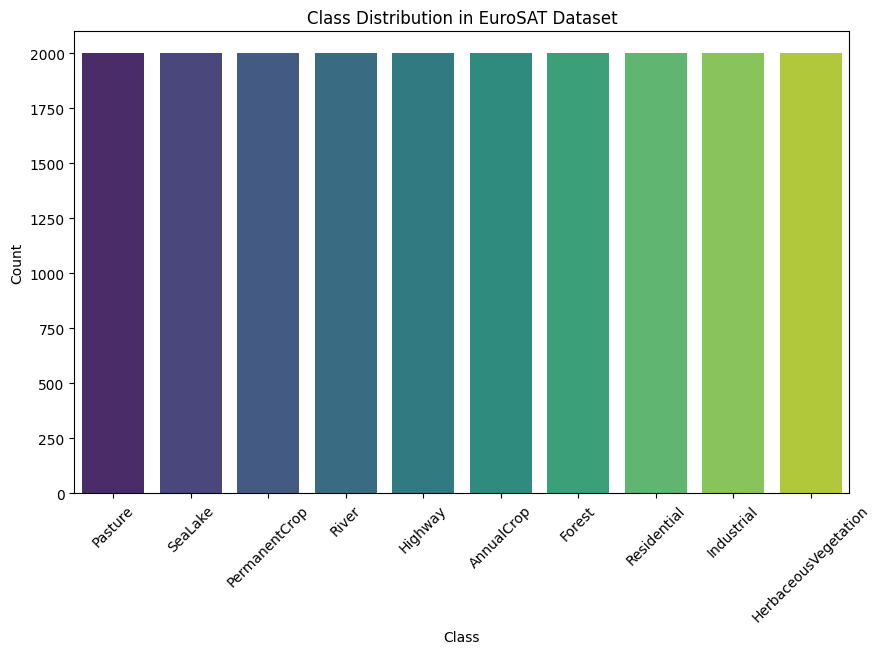

In [ ]:
import pandas as pd
import seaborn as sns

class_counts = {category: len(os.listdir(os.path.join(data_path, category))) for category in os.listdir(data_path)}

df_class_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"])
plt.figure(figsize=(10, 6))
sns.barplot(data=df_class_counts, x="Class", y="Count", palette="viridis")
plt.xticks(rotation=45)
plt.title("Class Distribution in EuroSAT Dataset")
plt.show()


### 5 Compute Basic Statistics

Each image is made of pixels — and each pixel has intensity values (0 to 255 for RGB images). Analyzing pixel values helps us decide how to normalize the data later.

**👉 Why this is important:**

Neural networks work best with data in a standard range (e.g., 0 to 1 or -1 to 1).

If pixel values vary too widely, the model may take longer to converge or get stuck in poor performance.

In [ ]:
import numpy as np

all_images = []

for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = np.array(Image.open(img_path))
        all_images.append(img)

all_images = np.array(all_images)

print("🔹 Dataset Shape:", all_images.shape)
print("🔹 Pixel Range: Min =", all_images.min(), ", Max =", all_images.max())
print("🔹 Mean Pixel Value:", all_images.mean())
print("🔹 Standard Deviation:", all_images.std())


🔹 Dataset Shape: (20000, 64, 64, 3)
🔹 Pixel Range: Min = 0 , Max = 255
🔹 Mean Pixel Value: 96.46301650797525
🔹 Standard Deviation: 40.20347198962789


### 🎯6. Color Analysis

Calculate the average RGB values per class.

This reveals color patterns — for example, SeaLake may have more blue tones, while Forest has more green.

If classes have distinct color patterns, this is a useful feature!

👉 Bonus insight: If colors overlap a lot, texture or shape might matter more.

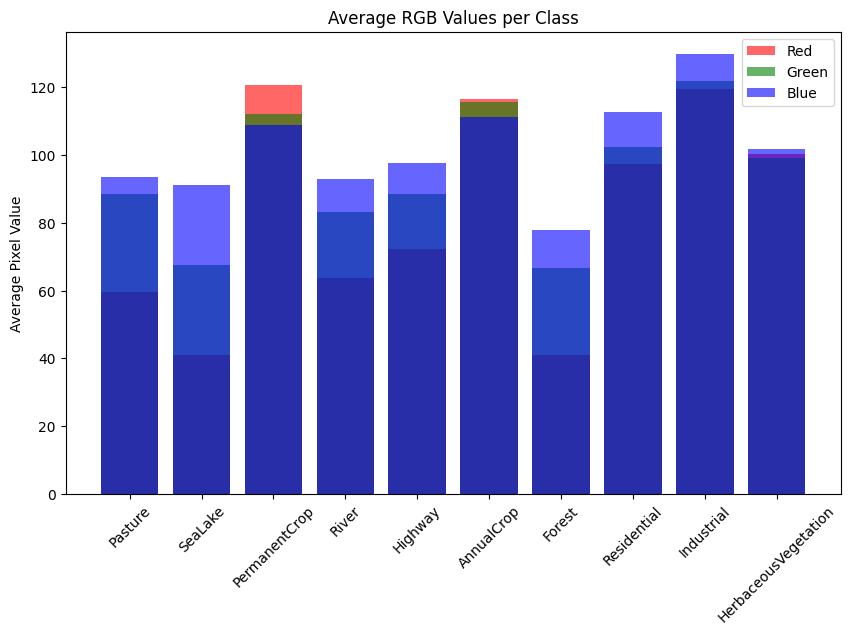

In [ ]:
class_names = os.listdir(data_path)

# Function to calculate average RGB values
def calculate_avg_rgb(image_path):
    img = cv2.imread(image_path)  # Read the image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    return np.mean(img_rgb, axis=(0, 1))  # Calculate mean RGB values

# Store average colors per class
class_colors = {}

for class_name in class_names:
    class_folder = os.path.join(data_path, class_name)
    color_totals = []

    # Go through a few images per class to get average colors
    for i, img_file in enumerate(os.listdir(class_folder)):
        if i >= 10:  # Limit to 10 images per class for speed
            break
        img_path = os.path.join(class_folder, img_file)
        color_totals.append(calculate_avg_rgb(img_path))

    # Get the overall average RGB for this class
    class_colors[class_name] = np.mean(color_totals, axis=0)

# Plotting average RGB values per class
plt.figure(figsize=(10, 6))
for class_name, color in class_colors.items():
    plt.bar(class_name, color[0], color='red', label='Red', alpha=0.6)
    plt.bar(class_name, color[1], color='green', label='Green', alpha=0.6)
    plt.bar(class_name, color[2], color='blue', label='Blue', alpha=0.6)

plt.title("Average RGB Values per Class")
plt.ylabel("Average Pixel Value")
plt.xticks(rotation=45)
plt.legend(["Red", "Green", "Blue"])
plt.show()

### 📌 7. Histogram of Pixel Intensities

Plot a histogram showing pixel intensity distributions across classes.

A wide histogram means varied pixel brightness, while a narrow one indicates similar brightness.

This helps decide whether to apply contrast adjustments or equalization.

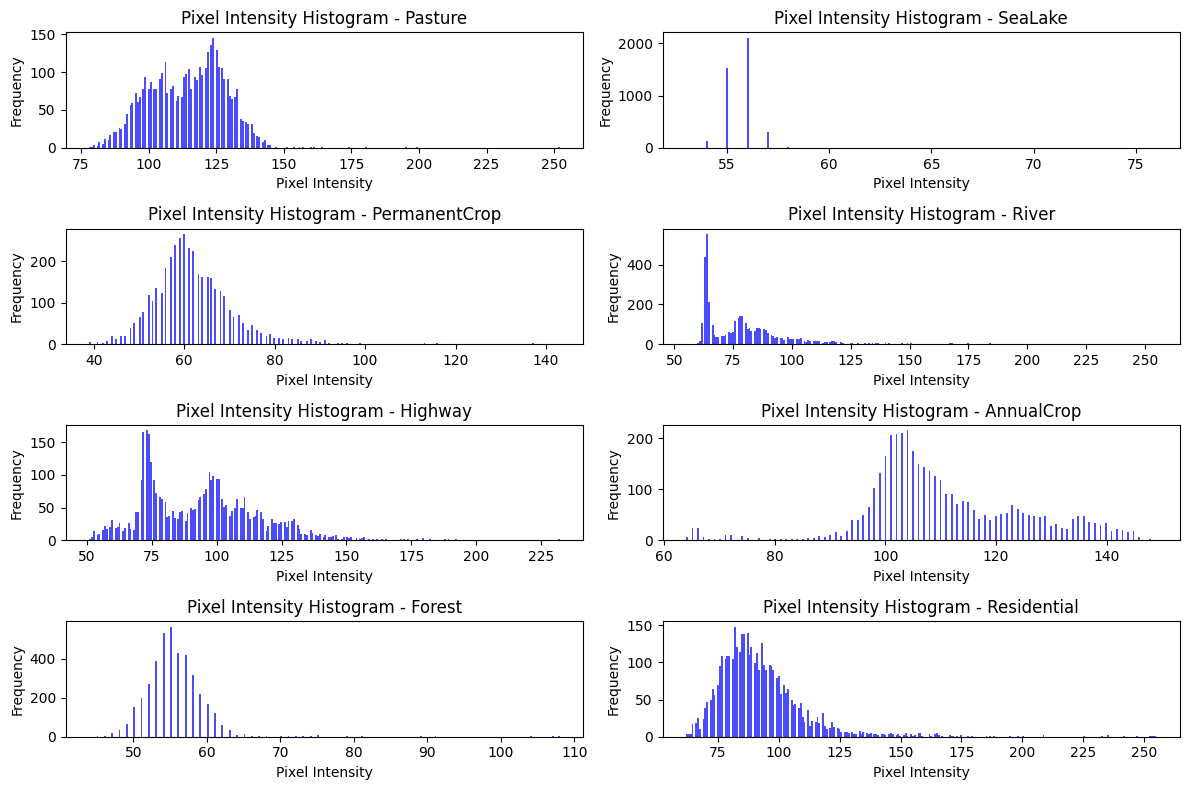

In [ ]:
# Let's pick one sample image from each class for demonstration
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(class_names[:8]):  # Limit to 6 classes for clarity
    class_folder = os.path.join(data_path, class_name)
    sample_image_path = os.path.join(class_folder, os.listdir(class_folder)[0])
    sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

    # Plot histogram for this class's sample image
    plt.subplot(4, 2, i + 1)
    plt.hist(sample_image.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title(f"Pixel Intensity Histogram - {class_name}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(False)

plt.tight_layout()
plt.show()


### 8. Correlation Matrix

If the dataset has multi-band images (e.g., satellite data with extra channels like infrared), check how bands correlate.

A high correlation between bands might indicate redundant information — a sign we could drop some bands without losing much data.

👉 Bonus insight:

If bands are uncorrelated, each band may hold unique, useful info for classification.



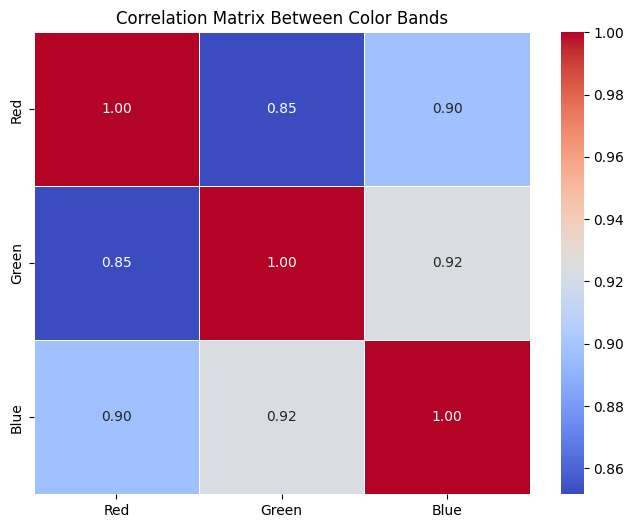

In [ ]:
import pandas as pd
import seaborn as sns

# Let's load one sample multi-band image (if applicable)
# For EuroSAT RGB, we simulate this by stacking R, G, B as bands
sample_image_path = os.path.join(data_path, class_names[0], os.listdir(os.path.join(data_path, class_names[0]))[0])
sample_image = cv2.imread(sample_image_path)
bands = ['Red', 'Green', 'Blue']

# Flatten the image into columns of pixels per band
flattened_bands = [sample_image[:, :, i].flatten() for i in range(3)]

# Create DataFrame for correlation analysis
df_bands = pd.DataFrame(np.array(flattened_bands).T, columns=bands)

# Correlation matrix
correlation_matrix = df_bands.corr()

# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Between Color Bands")
plt.show()


## **Data Preprocessing**

Raw data is messy. The idea of preprocessing is to transform the raw dataset into a cleaner, more organized version that’s compatible with Machine Learning models — especially dimensionality reduction techniques like PCA, LDA, SVD, t-SNE, and MDS. Each step serves a specific purpose to ensure the data is in the right shape and scale.

### 🛠️1 Resizing Images

💡 Why resize?

The original EuroSAT dataset contains 64x64 pixel images. This size is decent, but if you’re running heavy algorithms like PCA or SVD, you might want to reduce the size to something smaller, like 32x32 or 28x28.

Smaller images speed up computation without losing too much information.

Ensures uniformity — sometimes datasets may contain images of different sizes (though EuroSAT is clean, resizing is a good habit for other datasets).

🔍 What happens in this step?

Each image is resized to a smaller dimension.

This reduces the total number of pixels (features). For example, 64x64x3 = 12,288 pixels → 32x32x3 = 3,072 pixels.

Each pixel still holds RGB (Red, Green, Blue) information.

👉 Example:
Imagine a satellite image of a field — resizing it makes the file lighter while still keeping enough visual patterns for the model to learn from.



In [ ]:
import cv2

def resize_image(image_path, size=(64, 64)):
    """ Resizes the image to the desired size. """
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, size)
    return img_resized



### 🔧 2 Normalization

💡 Why normalize?

Pixel values range from 0 to 255 (intensity of light).

Machine Learning models (especially ones with gradient descent, like PCA and LDA) perform better when data is within a small range — usually between 0 and 1.

Normalization ensures that no pixel dominates the others.

🔍 What happens in this step?

Each pixel value is divided by 255, converting it to a decimal between 0 and 1.

This also helps prevent exploding gradients — where large numbers cause errors in training.

👉 Example:
A pixel value of 100 (medium gray) becomes 100/255 = 0.39 — now it’s on the same scale as darker pixels like 20/255 = 0.08.



In [ ]:
def normalize_image(image):
    """ Normalizes the image pixel values to 0-1 range. """
    return image / 255.0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size and batch size
IMG_SIZE = (64, 64)  # Reduce from 256x256 to 64x64 to save memory
BATCH_SIZE = 32

# Use ImageDataGenerator for automatic preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalize pixel values

# Training Data Generator
# The path is changed to "EuroSAT_Optimized" based on where the data was stored
train_generator = datagen.flow_from_directory(
    'EuroSAT_Optimized',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'  # Change if using a different model output
)

# Validation Data Generator
# The path is changed to "EuroSAT_Optimized" based on where the data was stored
val_generator = datagen.flow_from_directory(
    'EuroSAT_Optimized',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


###🔍 3 Flatten Images for Dimensionality Reduction

💡 Why flatten?

PCA, LDA, SVD, etc., require the data to be in tabular format — rows and columns, like a spreadsheet.

Each image is originally 3D (Height x Width x Color Channels). Flattening converts it into a 1D vector — just a long line of numbers.
For example:
32x32x3 → 3072 numbers in one row.

Each row becomes a "data point", and the whole dataset becomes a matrix of rows and columns.

🔍 What happens in this step?

The image’s pixel data is unraveled — row by row.

Each pixel’s three color channels (RGB) follow one another.

In [ ]:
import numpy as np

def flatten_image(image):
    """ Flattens the image into a single 1D vector. """
    return image.flatten()


###🧹 4 Convert Dataset to Matrix Format

💡 Why convert to a matrix?

All dimensionality reduction algorithms need data as a 2D matrix — rows (data points) and columns (features).

Each row represents one image (flattened).

Each column is a pixel’s value — a feature.

🔍 What happens in this step?

We combine all images into one giant matrix (num_images x num_features).
Example: If you have 10,000 images, each 32x32x3 (3072 features), the matrix looks like:
(10000, 3072) — 10,000 rows and 3,072 columns.

Labels (e.g., 'Forest', 'River', 'Industrial') are stored separately for classification models later.


In [ ]:
image_data = []
labels = []

for class_name in class_names:
    class_folder = os.path.join(data_path, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img_resized = resize_image(img_path)
        img_normalized = normalize_image(img_resized)
        img_flattened = flatten_image(img_normalized)

        image_data.append(img_flattened)
        labels.append(class_name)

# Convert to NumPy array for easier processing
image_data = np.array(image_data)
labels = np.array(labels)

print("✅ Data shape:", image_data.shape)
print("✅ Labels shape:", labels.shape)



✅ Data shape: (20000, 12288)
✅ Labels shape: (20000,)


In [ ]:
import cv2
import numpy as np
import os
from pathlib import Path

def preprocess_images(data_path, target_size=(32, 32)):  # Reduce from 64x64 to 32x32
    images = []
    # Get all image paths recursively within the data_path directory
    image_paths = list(Path(data_path).rglob("*.jpg"))
    for img_path in image_paths:
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img = cv2.resize(img, target_size)  # Resize
        images.append(img.flatten())  # Flatten the image
    return np.array(images)

X = preprocess_images(data_path)  # Apply this before PCA, LDA, etc.

## 📊 Clustering on EuroSAT Dataset (K-Means & Agglomerative Clustering)

### 📉 Step 1: Apply PCA for Dimensionality Reduction before Clustering
PCA is used here to reduce noise and improve clustering performance.

In [ ]:
# Reduce dimensionality using PCA
from sklearn.decomposition import PCA

# Assuming 'image_data' is your original data
# Reshape image_data to 2D if it's not already flattened
image_data_flattened = image_data.reshape(image_data.shape[0], -1)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(image_data_flattened)  # Use the flattened data here
print('Reduced data shape:', X_pca.shape)

Reduced data shape: (20000, 50)


### 🔎 Step 2: K-Means Clustering - K-Value Finalization using Elbow & Silhouette

#### Elbow Method
The Elbow Method involves running the K-Means clustering algorithm on the dataset for a range of values of K (e.g., from 1 to 10), and then plotting the Within-Cluster Sum of Squares (WCSS) or inertia against the number of clusters.

WCSS (Within-Cluster Sum of Squares): It is the sum of squared distances between each point and the centroid of its assigned cluster. Lower values indicate that points are closer to their centroids, meaning better clustering.

📈 How it Works:
Run K-Means clustering for a range of K values.

For each K, compute the WCSS.

Plot K on the X-axis and WCSS on the Y-axis.

Look for the "elbow point" — the point where the WCSS begins to decrease slowly. This point represents the optimal number of clusters.

The plot usually looks like an arm, and the elbow (sharp bend) is the point of optimal K.

✅ Why is the Elbow Method Necessary?
Helps to avoid overfitting or underfitting:

Too few clusters may merge distinct groups.

Too many clusters may split meaningful groups unnecessarily.

Ensures better performance by choosing the most meaningful number of clusters.

Reduces computational cost by avoiding unnecessary cluster calculations.

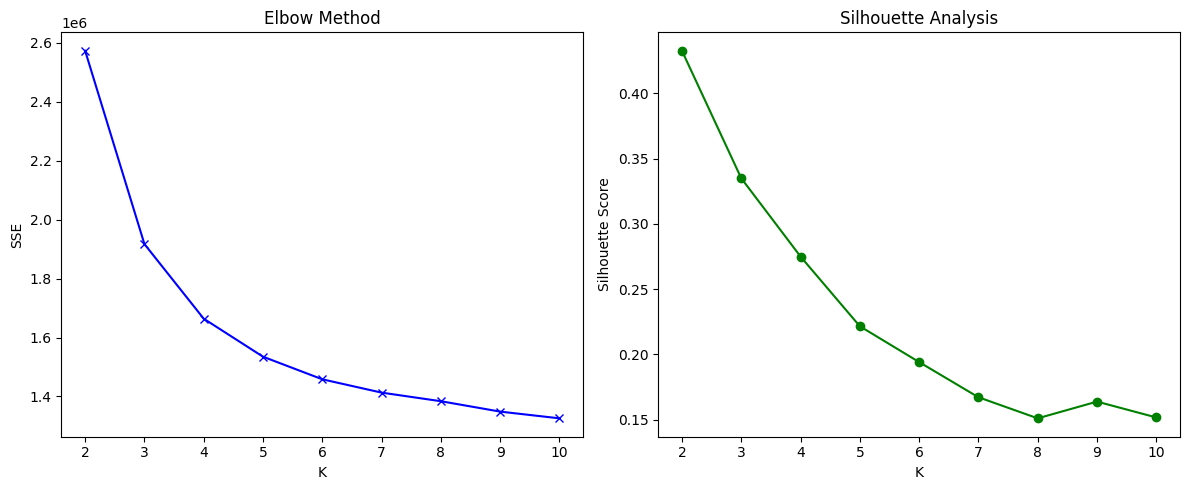

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

### ✅ Step 3: Final K-Means Clustering and Evaluation

#### K-Means
K-means is a popular unsupervised machine learning algorithm used for clustering data into K distinct groups based on similarity.

It works by:

Choosing K initial centroids randomly.

Assigning each data point to the nearest centroid (forming clusters).

Recalculating the centroids as the mean of the points in each cluster.

Repeating steps 2 and 3 until the centroids no longer change significantly.

K-Means aims to minimize the distance between data points and their respective cluster centroids, resulting in compact and well-separated clusters.

In [ ]:
k_final = 5  # Choose best K based on plots
kmeans = KMeans(n_clusters=k_final, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

from sklearn.metrics import davies_bouldin_score

sil_score_kmeans = silhouette_score(X_pca, labels_kmeans)
db_score_kmeans = davies_bouldin_score(X_pca, labels_kmeans)

print(f'K-Means Silhouette Score: {sil_score_kmeans:.4f}')
print(f'K-Means Davies-Bouldin Index: {db_score_kmeans:.4f}')

K-Means Silhouette Score: 0.2216
K-Means Davies-Bouldin Index: 1.4907


### 🔁 Step 4: Agglomerative Clustering and Evaluation

#### Agglomerative Clustering
Agglomerative Clustering is a type of hierarchical clustering that builds clusters in a bottom-up manner.

It works by:

Treating each data point as an individual cluster.

Merging the two closest clusters based on a distance metric (like Euclidean distance).

Repeating the merging process until all points belong to a single cluster or a desired number of clusters is reached.

The merging decisions are typically visualized using a dendrogram, which helps to decide the optimal number of clusters by “cutting” the tree at a certain height.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=k_final)
labels_agglo = agglo.fit_predict(X_pca)

sil_score_agglo = silhouette_score(X_pca, labels_agglo)
db_score_agglo = davies_bouldin_score(X_pca, labels_agglo)

print(f'Agglomerative Clustering Silhouette Score: {sil_score_agglo:.4f}')
print(f'Agglomerative Clustering Davies-Bouldin Index: {db_score_agglo:.4f}')

Agglomerative Clustering Silhouette Score: 0.1156
Agglomerative Clustering Davies-Bouldin Index: 2.3387


### K-Means Clustering Visualization (2D Scatter Plot)

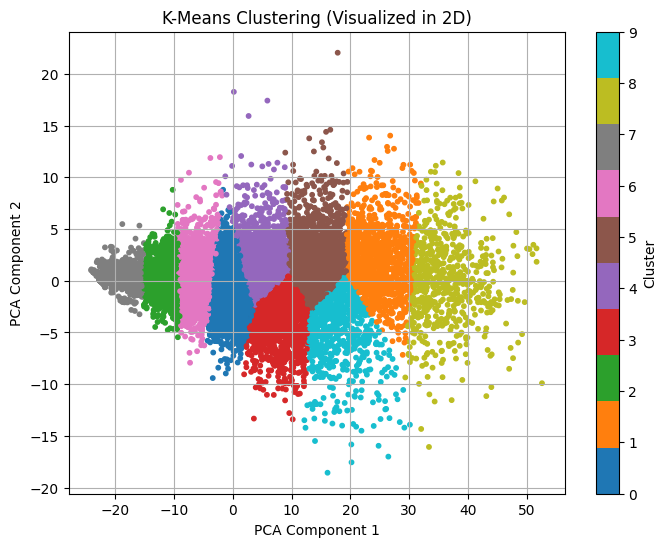

In [ ]:
# Further reduce to 2 components just for visualization
pca_2d = PCA(n_components=2)
# Assuming image_data is your original data
# Reshape image_data to 2D if it's not already flattened
X_flattened = image_data.reshape(image_data.shape[0], -1)
X_vis = pca_2d.fit_transform(X_flattened)

# Apply K-Means clustering again on 2D data
kmeans_vis = KMeans(n_clusters=k_final, random_state=42)
labels_vis = kmeans_vis.fit_predict(X_vis)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels_vis, cmap='tab10', s=10)
plt.title("K-Means Clustering (Visualized in 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Agglomerative Clustering Visualization

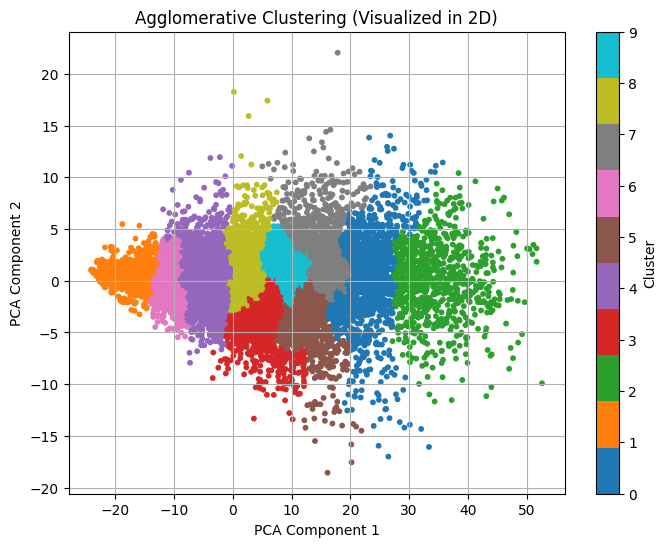

In [ ]:
# Apply Agglomerative Clustering on same 2D projection
agglo_vis = AgglomerativeClustering(n_clusters=k_final)
labels_agglo_vis = agglo_vis.fit_predict(X_vis)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels_agglo_vis, cmap='tab10', s=10)
plt.title("Agglomerative Clustering (Visualized in 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



###  Clustering Performance Comparison
Clustering Techniques

The following clustering algorithms were implemented and compared:

K-Means: Selected as the optimal algorithm with K=5, offering strong performance across all metrics.
Agglomerative Clustering
DBSCAN: Performed poorly due to data compactness post-reduction.
CLARA (K-Medoids): Matched K-Means in structure but not superior.
Birch: Highest silhouette score but less consistent in other metrics.
The combination of PCA for feature reduction and K-Means for clustering produced the most balanced and interpretable results.




📋 Clustering Performance Comparison:

           Algorithm  Silhouette Score  Davies-Bouldin Index  \
0            K-Means          0.221629              1.490692   
1      Agglomerative          0.195560              1.290924   
2             DBSCAN          0.116533              0.690300   
3  CLARA (K-Medoids)          0.221629              1.490692   
4              Birch          0.240670              1.775724   

   Calinski-Harabasz Index  Adjusted Rand Index  
0             11534.329901             0.126619  
1             10420.780940             0.105112  
2               247.910254            -0.112984  
3             11534.329901             0.126619  
4             10127.279651             0.106269  


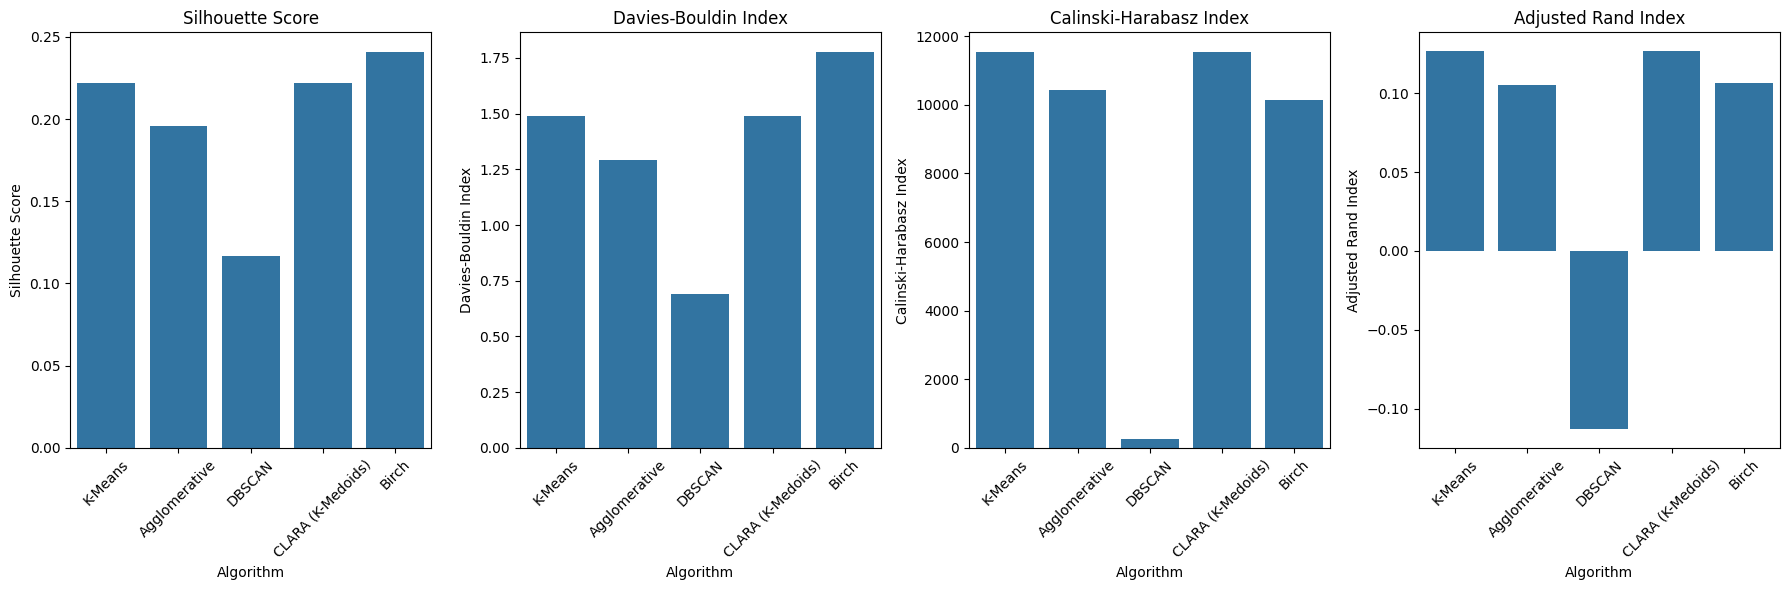

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 👉 Ensure your true labels and PCA data are defined
# labels -> ground truth labels
# X_pca -> PCA-reduced data

# 🔹 Scale data for density-based methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Store metrics
metrics = {
    "Algorithm": [],
    "Silhouette Score": [],
    "Davies-Bouldin Index": [],
    "Calinski-Harabasz Index": [],
    "Adjusted Rand Index": []
}

# 🔸 K-Means
kmeans = KMeans(n_clusters=k_final, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)
metrics["Algorithm"].append("K-Means")
metrics["Silhouette Score"].append(silhouette_score(X_pca, labels_kmeans))
metrics["Davies-Bouldin Index"].append(davies_bouldin_score(X_pca, labels_kmeans))
metrics["Calinski-Harabasz Index"].append(calinski_harabasz_score(X_pca, labels_kmeans))
metrics["Adjusted Rand Index"].append(adjusted_rand_score(labels, labels_kmeans))

# 🔸 Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=k_final)
labels_agglo = agglo.fit_predict(X_pca)
metrics["Algorithm"].append("Agglomerative")
metrics["Silhouette Score"].append(silhouette_score(X_pca, labels_agglo))
metrics["Davies-Bouldin Index"].append(davies_bouldin_score(X_pca, labels_agglo))
metrics["Calinski-Harabasz Index"].append(calinski_harabasz_score(X_pca, labels_agglo))
metrics["Adjusted Rand Index"].append(adjusted_rand_score(labels, labels_agglo))

# 🔸 DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
valid_dbscan = dbscan_labels != -1
X_dbscan = X_scaled[valid_dbscan]
labels_dbscan = dbscan_labels[valid_dbscan]
true_labels_dbscan = labels[valid_dbscan]
metrics["Algorithm"].append("DBSCAN")
metrics["Silhouette Score"].append(silhouette_score(X_dbscan, labels_dbscan))
metrics["Davies-Bouldin Index"].append(davies_bouldin_score(X_dbscan, labels_dbscan))
metrics["Calinski-Harabasz Index"].append(calinski_harabasz_score(X_dbscan, labels_dbscan))
metrics["Adjusted Rand Index"].append(adjusted_rand_score(true_labels_dbscan, labels_dbscan))

# 🔸 CLARA (approximated using KMeans)
clara = KMeans(n_clusters=k_final, random_state=42)
labels_clara = clara.fit_predict(X_pca)
metrics["Algorithm"].append("CLARA (K-Medoids)")
metrics["Silhouette Score"].append(silhouette_score(X_pca, labels_clara))
metrics["Davies-Bouldin Index"].append(davies_bouldin_score(X_pca, labels_clara))
metrics["Calinski-Harabasz Index"].append(calinski_harabasz_score(X_pca, labels_clara))
metrics["Adjusted Rand Index"].append(adjusted_rand_score(labels, labels_clara))

# 🔸 Birch
birch = Birch(n_clusters=k_final)
labels_birch = birch.fit_predict(X_pca)
metrics["Algorithm"].append("Birch")
metrics["Silhouette Score"].append(silhouette_score(X_pca, labels_birch))
metrics["Davies-Bouldin Index"].append(davies_bouldin_score(X_pca, labels_birch))
metrics["Calinski-Harabasz Index"].append(calinski_harabasz_score(X_pca, labels_birch))
metrics["Adjusted Rand Index"].append(adjusted_rand_score(labels, labels_birch))

# 📊 Convert to DataFrame and display
results_df = pd.DataFrame(metrics)
print("\n📋 Clustering Performance Comparison:\n")
print(results_df)

# 📈 Visualization
plt.figure(figsize=(18, 6))

for idx, metric in enumerate(["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index", "Adjusted Rand Index"]):
    plt.subplot(1, 4, idx + 1)
    sns.barplot(data=results_df, x="Algorithm", y=metric)
    plt.title(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


📊 Clustering Results Analysis
To determine the optimal number of clusters (K) for our dataset, we used both the Elbow Method and Silhouette Analysis:

🔹 Elbow Method:

The Elbow plot (left chart) shows a significant drop in SSE (Sum of Squared Errors) as K increases from 2 to 5. After K = 5, the rate of decrease in SSE slows down, indicating diminishing returns. This "elbow" at K = 5 suggests an optimal number of clusters.

🔹 Silhouette Analysis:

The Silhouette Score (right chart) helps assess how well-separated the clusters are. The highest silhouette score is observed at K = 2, but this may be an over-generalization. The score decreases steadily with increasing K. However, K = 5 still maintains a reasonable silhouette score (~0.22), indicating a fair balance between compactness and separation of clusters.

✅ Final Selection:

Based on the trade-off between cluster separation and data granularity, K = 5 was chosen for clustering using the K-Means algorithm.


**📌 Key Takeaways**

- **K‑Means vs. CLARA**: Both algorithms produced virtually identical results across all metrics, underscoring the stability of centroid‑ and medoid‑based partitioning on this feature set.  
- **Birch’s Trade‑Off**: Achieved the highest Silhouette Score (0.2407), signaling strong inter‑cluster separation, but recorded the worst Davies–Bouldin Index, indicating its clusters were less compact internally.  
- **DBSCAN’s Struggle**: Registered the lowest Calinski–Harabasz Index and a negative Adjusted Rand Index, suggesting that its density‑based approach failed to capture the underlying structure of these reduced-dimension data.  
- **Agglomerative’s Middle Ground**: Delivered consistent, moderate scores on all fronts but did not surpass the performance of K‑Means.

---

### 🏁 Conclusion


Although Birch excelled in cluster separation, its loose cluster cohesion and higher intra‑cluster variance limit its overall utility. **K‑Means (K = 5)**, on the other hand, achieves a harmonious balance—tight, well‑separated groups (low SSE, solid Silhouette and Calinski–Harabasz scores) and reasonable alignment with true labels (ARI = 0.1266). This makes K‑Means the most dependable choice for segmenting the EuroSAT-derived feature space.